**Data consist of geometric shapes with a total of 13 target labels**

In [4]:
import zipfile
# Open the zip file
with zipfile.ZipFile("data.zip", 'r') as zip_ref:
    # Extract all the contents
    zip_ref.extractall()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
# Read csv
train_df = pd.read_csv("data/train/_classes.csv", sep=', ', engine="python")

# Mapping int to categories
CLASSES = train_df.columns[1:]
CLASSES_INT = np.arange(len(CLASSES))
cat_to_int = dict(list(zip(CLASSES,CLASSES_INT)))
int_to_cat = dict(list(zip(CLASSES_INT,CLASSES)))
cat_to_int

{'circle': 0,
 'cross': 1,
 'heptagon': 2,
 'hexagon': 3,
 'octagon': 4,
 'pentagon': 5,
 'quartercircle': 6,
 'rectangle': 7,
 'semicircle': 8,
 'square': 9,
 'star': 10,
 'trapezoid': 11,
 'triangle': 12}

In [7]:
train_df.head()

,filename,circle,cross,heptagon,hexagon,octagon,pentagon,quartercircle,rectangle,semicircle,square,star,trapezoid,triangle
0,270rectangle_rad_50_jpg.rf.d8cb2e97f51001739f9...,0,0,0,0,0,0,0,1,0,0,0,0,0
1,135trapezoid_rad_30_jpg.rf.cfdc844471c790910d3...,0,0,0,0,0,0,0,0,0,0,0,1,0
2,180semicircle_rad_30_jpg.rf.d4bae55fadaf466b67...,0,0,0,0,0,0,0,0,1,0,0,0,0
3,trapezoid_rad_200_jpg.rf.cb30863a474e4ec4fb563...,0,0,0,0,0,0,0,0,0,0,0,1,0
4,135square_rad_50_jpg.rf.d7fde9eaaaedc0d4fe75f2...,0,0,0,0,0,0,0,0,0,1,0,0,0


**Reshaping the data format**

The CSV file of the original dataset contains two columns: the filename and the corresponding category. 

We apply two main transformation:

1. We wap the one hot encoding format to integer categories to obtain our target variable y.
2. We transform the jpg images in an np array X.

Note: Originally all images are 640 pixels by 640 pixels. 
Each pixel is dimension 3 : [R,G,B] but we reduce the dimension in order to have only black and white images.


(640, 640, 3)


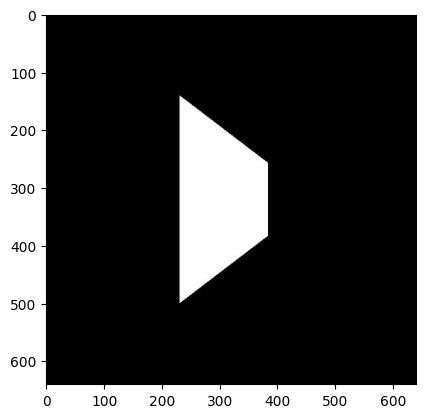

In [8]:
#We transfer all the names of the images into `X_train_names`.
X_train_names = np.array(train_df['filename'])
# Read Image name
index = 3
img_name = X_train_names[index]

# Read Image
img = mpimg.imread("data/train/" + img_name)

# Output Image
plt.imshow(img)
#shape 
print(img.shape)

All images are 640 pixels by 640 pixels. 
Each pixel is dimension 3 : [R,G,B]. 
Here, the figure is white, i.e. [255,255,255], so we can reduce the dimension in order to have only black and white images.



In [6]:
#Create X_train
def name_to_array(img_name, path="data/train/"):
    img = mpimg.imread(path + img_name)
    return img[:,:,0]
X_train = np.array(list(map(name_to_array,X_train_names)))
X_train.shape

(314, 640, 640)

In [7]:
# Create y_train
# Mapping into categories
n,m = train_df.shape
y_train = np.zeros(n,'int')

for i in range(n):
    row = train_df.loc[i]
    y_train[i] = np.argmax(row[1:])

y_train

array([ 7, 11,  8, 11,  9, 11, 10,  0,  4,  9,  3,  6,  8,  8,  3,  0, 10,
        8, 11,  5,  0,  7,  5,  7, 12, 12,  4,  2,  9,  2, 12,  3, 10,  3,
       10,  0,  4,  5,  8,  1,  2,  9,  4, 11,  4,  0,  3,  8,  2, 11,  0,
        0,  3,  7, 12,  6, 12, 11,  9,  7, 12,  4,  1, 12, 12,  1,  8,  1,
       10,  4, 11,  7, 11,  2,  2, 12,  4, 10, 10,  3, 10, 12,  1,  4, 12,
        0, 10, 12,  3, 10,  5, 12, 10,  5,  1,  1,  6, 11,  1,  6,  8,  2,
       10,  5, 11, 10, 11, 10,  2,  8,  6,  3,  2,  8,  5, 10,  8,  7,  1,
       11, 12,  2,  6,  9,  1, 12, 11,  1,  6,  9,  7, 11,  9,  8, 10, 11,
        5,  6,  5,  3,  3,  5, 11,  4,  1, 12,  7, 12,  2,  8,  1,  6,  0,
       12,  1,  1, 11,  2, 10,  5,  3,  5, 10,  5,  9, 10,  2,  7,  3,  0,
        2,  7,  9,  0, 12,  2,  7,  0, 11,  1,  2, 11, 12, 11,  6,  6,  6,
        1, 11,  1,  6,  7,  9,  3,  6, 12, 11,  3, 12,  1,  7,  2,  7, 11,
        4, 11,  1,  1,  0,  0, 11,  1,  0,  7,  6,  8, 12,  7,  9,  4,  4,
        0,  3,  8,  7,  2

In [10]:
test_df = pd.read_csv("data/test/_classes.csv", sep=', ', engine="python")
X_test_names = np.array(test_df['filename'])
#Create X_test
def name_to_array(img_name, path="data/test/"):
    img = mpimg.imread(path + img_name)
    return img[:,:,0]
X_test = np.array(list(map(name_to_array,X_test_names)))
X_test.shape

(44, 640, 640)

In [13]:
# Create y_test
# Mapping into categories
n,m = test_df.shape
y_test = np.zeros(n,'int')

for i in range(n):
    row = train_df.loc[i]
    y_test[i] = np.argmax(row[1:])

y_test

array([ 7, 11,  8, 11,  9, 11, 10,  0,  4,  9,  3,  6,  8,  8,  3,  0, 10,
        8, 11,  5,  0,  7,  5,  7, 12, 12,  4,  2,  9,  2, 12,  3, 10,  3,
       10,  0,  4,  5,  8,  1,  2,  9,  4, 11])

In [12]:
# Saving data
np.savez("data/train_data_1.npz", xtrain=X_train, ytrain=y_train)
np.savez("data/test_data_1.npz", xtest=X_test, ytest=y_test)
